## Week 1 HW: Stationarity and Random Walk
### Jingwen Li

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Stationarity

### A. Perform EDA on the dataset. Include both quantitative and qualitative descriptions. Check for missing data and correlations.

In [57]:
data = pd.read_csv('hw1_data.csv', index_col=0)
data

,IWM,QQQ,SPY
Date,,,
2000-05-26,34.800865,67.670738,93.363678
2000-05-30,36.085365,74.470436,96.408173
2000-05-31,36.216213,72.348938,96.619591
2000-06-01,37.036850,76.048004,98.310966
2000-06-02,38.963646,81.487755,100.023491
...,...,...,...
2020-02-26,152.328430,215.254486,305.789459
2020-02-27,146.964890,204.475845,292.055939
2020-02-28,144.273254,204.634949,290.828827


In [58]:
data.describe()

,IWM,QQQ,SPY
count,4972.000000,4972.000000,4972.000000
mean,77.254619,70.539066,134.360431
std,38.722995,49.057235,66.778492
min,25.456144,17.459492,53.503864
25%,46.092833,34.344567,85.923027
50%,63.785954,48.595505,105.741215
75%,106.390139,99.085045,180.474552
max,167.320114,235.638428,332.137360


<AxesSubplot: xlabel='Date'>

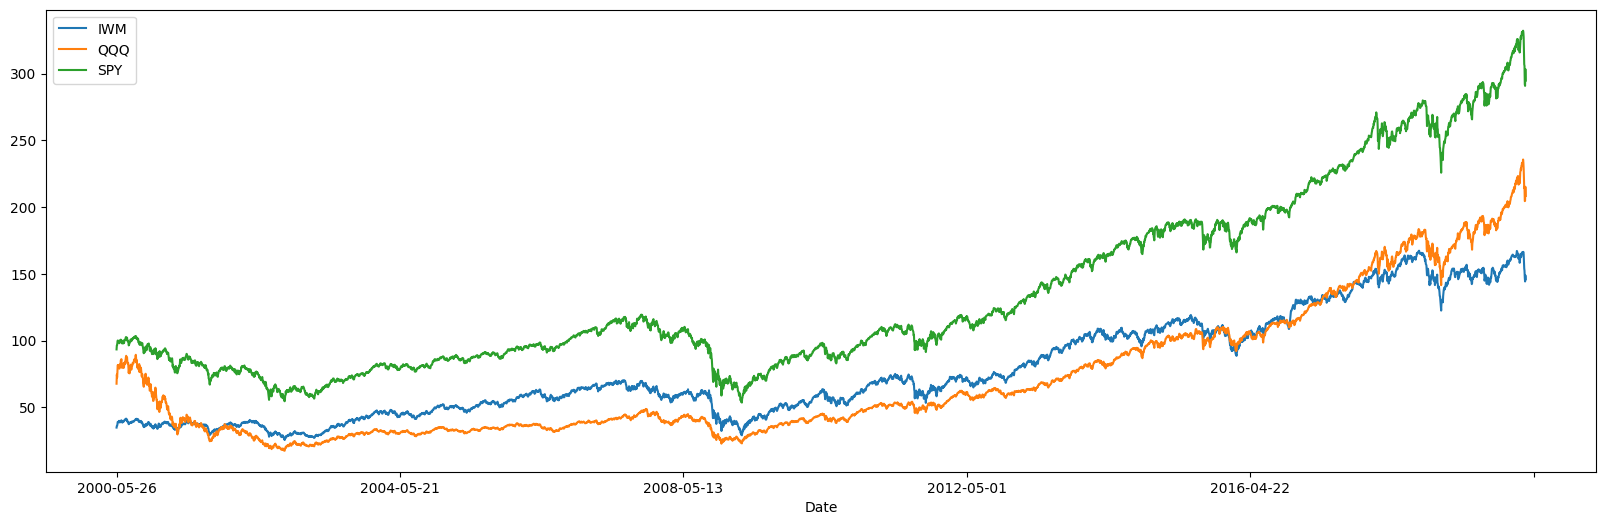

In [59]:
data.plot(figsize=(20, 6))

#### Quantitative description:

#### Qualitative description:

    Check for missing data

In [60]:
data.isnull().sum()

IWM    0
QQQ    0
SPY    0
dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4972 entries, 2000-05-26 to 2020-03-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IWM     4972 non-null   float64
 1   QQQ     4972 non-null   float64
 2   SPY     4972 non-null   float64
dtypes: float64(3)
memory usage: 155.4+ KB


    Check for correlation

In [62]:
corr = data.corr()
corr

,IWM,QQQ,SPY
IWM,1.000000,0.950877,0.982987
QQQ,0.950877,1.000000,0.986423
SPY,0.982987,0.986423,1.000000


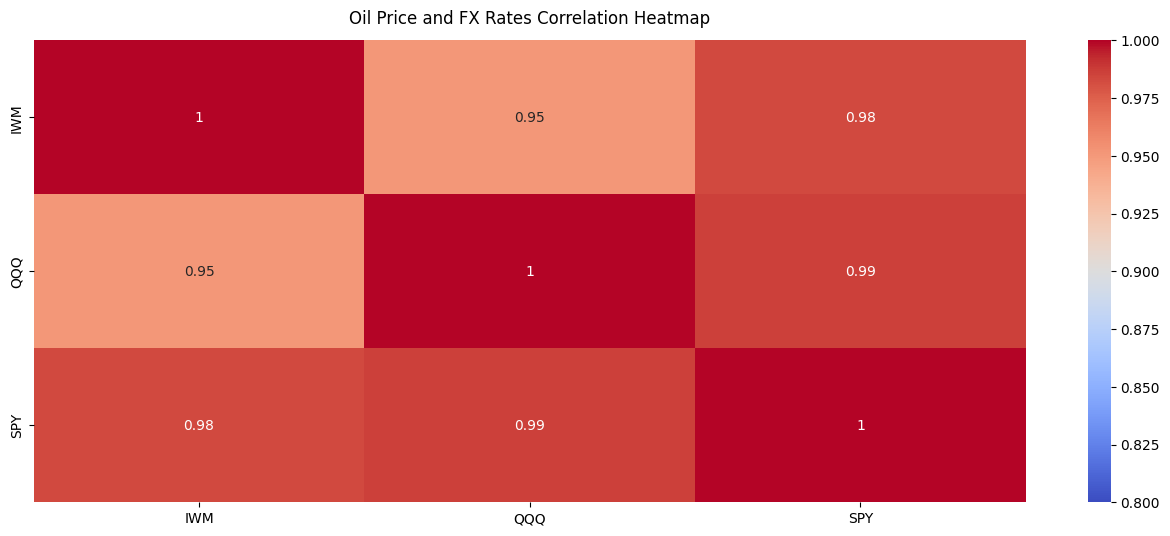

In [63]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr,  vmin=0.8, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Oil Price and FX Rates Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### B. Describe the data. Do you expect this data to be stationary? Do you expect this data to be a random walk?

Based on visual inspection of the plot, it appears that there is an upward trend in the data, which suggests that the data is likely non-stationary. The presence of a trend indicates that the mean of the data changes over time, violating the assumption of stationarity that the mean remains constant over time. Additionally, a random walk model may not be appropriate for this data, as it assumes that the mean is constant over time and the data follows a random walk pattern with no trend. 

### C. Create a function that returns the stationarity test results from both ADF and KPSS tests.

In [64]:
def adf_kpss_test(data):
    adf_results = []
    kpss_results = []
    for col in data.columns:
        adf_result = adfuller(data[col])
        kpss_result = kpss(data[col])
        adf_dict = {'Asset': col,
                    'ADF Statistic': adf_result[0],
                    'p-value': adf_result[1]}
        kpss_dict = {'Asset': col,
                     'KPSS Statistic': kpss_result[0],
                     'p-value': kpss_result[1]}
        for key, value in adf_result[4].items():
            adf_dict['Critical Value ({})'.format(key)] = value
        for key, value in kpss_result[3].items():
            kpss_dict['Critical Value ({})'.format(key)] = value
        adf_results.append(adf_dict)
        kpss_results.append(kpss_dict)
    adf_df = pd.DataFrame(adf_results).set_index('Asset')
    kpss_df = pd.DataFrame(kpss_results).set_index('Asset')
    return pd.concat([adf_df, kpss_df], axis=1)

### D. Use the function to test if each series is stationary. Return results from both ADF and KPSS tests for all three time series

In [65]:
adf_kpss_test(data)

,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),KPSS Statistic,p-value,Critical Value (10%),Critical Value (5%),Critical Value (2.5%),Critical Value (1%)
Asset,,,,,,,,,,,
IWM,-0.148096,0.944432,-3.431671,-2.862124,-2.567081,10.131983,0.01,0.347,0.463,0.574,0.739
QQQ,2.525983,0.999058,-3.431674,-2.862125,-2.567082,8.767624,0.01,0.347,0.463,0.574,0.739
SPY,1.575206,0.997781,-3.431671,-2.862124,-2.567081,9.349531,0.01,0.347,0.463,0.574,0.739


Comment: 
The results show that for each asset (IWM, QQQ, SPY), the ADF Statistics, the p-values are also higher than the significance level of 0.05, suggesting that we cannot reject the null hypothesis that the data is non-stationary. 

In addition, the KPSS Statistic values are higher than the critical values and P-values smaller than 0.05, indicating that we can reject the null hypothesis that the data is stationary, and conclude that the data is non-stationary. Overall, the results suggest that the data for each asset is non- stationary.

### E. Difference the three time series and return stationarity results from both ADF and KPSS tests

In [17]:
data_diff = data.diff().dropna()
data_diff

,IWM,QQQ,SPY
Date,,,
2000-05-30,1.284500,6.799698,3.044495
2000-05-31,0.130848,-2.121498,0.211418
2000-06-01,0.820637,3.699066,1.691376
2000-06-02,1.926796,5.439751,1.712524
2000-06-05,-0.142731,0.203979,-0.486259
...,...,...,...
2020-02-26,-1.784561,1.103729,-1.128876
2020-02-27,-5.363541,-10.778641,-13.733521
2020-02-28,-2.691635,0.159103,-1.227112


In [18]:
adf_kpss_test(data_diff)

,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),KPSS Statistic,p-value,Critical Value (10%),Critical Value (5%),Critical Value (2.5%),Critical Value (1%)
Asset,,,,,,,,,,,
IWM,-16.918990,9.973516e-30,-3.431671,-2.862124,-2.567081,0.087090,0.100000,0.347,0.463,0.574,0.739
QQQ,-12.637759,1.457323e-23,-3.431674,-2.862125,-2.567082,1.082735,0.010000,0.347,0.463,0.574,0.739
SPY,-16.838864,1.142343e-29,-3.431671,-2.862124,-2.567081,0.543726,0.031818,0.347,0.463,0.574,0.739


Comment: 

In this table, all three assets have ADF statistics with values more negative than the critical values at all levels, and p-values smaller than 0.05. This indicates strong evidence against the null hypothesis of non-stationarity and suggests that the time series for all three assets are stationary. 

IWM has KPSS statistics with value smaller than the critical values at all levels, and p-values that are greater than 0.05, fail to reject null hypothesis of stationarity. QQQ has KPSS statistics with value higher than the critical values at all levels, and p-value smaller than 0.05, reject null hypothesis of stationarity. SPY has KPSS statistics with value higher than the critical values at 10% and 5% levels, however smaller than critical values at 2.5% and 1% levels , and p-value smaller than 0.05, stationary is not clear. 

Overall IWM stationary, QQQ is difference stationary, SPY difference stationary at 10% and 5% levels, stationary at 2.5% and 1% levels.

### F. In general, explain how you can get different stationarity results from the two tests. 

Because Non-stationary time series often have a trend component, which can cause the mean of the series to change over time. Taking the first difference of the series (i.e., subtracting each observation from the previous observation) can remove this trend component and make the series stationary.

### G. Concept: What does trend stationary mean?

A stochastic process is trend stationary if the underlying trend can be removed and the resulting process is stationary. In other words, the mean and variance of the process are constant over time after removing the trend component.

Trend stationary processes are often referred to as mean-reverting processes, because they exhibit a tendency to return to a long-run equilibrium level or trend. This means that if the process experiences a shock or disturbance, it will eventually converge back to the underlying trend.

## Random Walk

### A. Using random.sample create a sample with length 1000 of 1 if >=0.5 and -1 if less than 0.5

In [82]:
sample = [1 if random.random() >= 0.5 else -1 for _ in range(1000)]
sample_df = pd.DataFrame(sample, columns=['sample'])
sample_df

,sample
0,-1
1,-1
2,1
3,-1
4,1
...,...
995,-1
996,-1
997,-1
998,1


### B. Use cumulative sum to create movement

In [83]:
movement =  np.cumsum(sample)
movement_df = pd.DataFrame(movement, columns=['movement'])
movement_df

,movement
0,-1
1,-2
2,-1
3,-2
4,-1
...,...
995,-14
996,-15
997,-16
998,-15


### C. Describe which of the two series created in 2a and 2b is a random walk, why? What is the other series?

A random walk is a type of stochastic process where a variable moves randomly and independently over time. Specifically, a random walk is a time series where each observation is equal to the previous observation plus a random shock or "step" that is drawn from a probability distribution. According to this, 2b is a random walk. 2a is a white noise - it has mean of zero, a constant finite variance and auto covariance is zero.

### D. Create two plots of the random walk time series, use .plot() and use autocorrelation_plot()

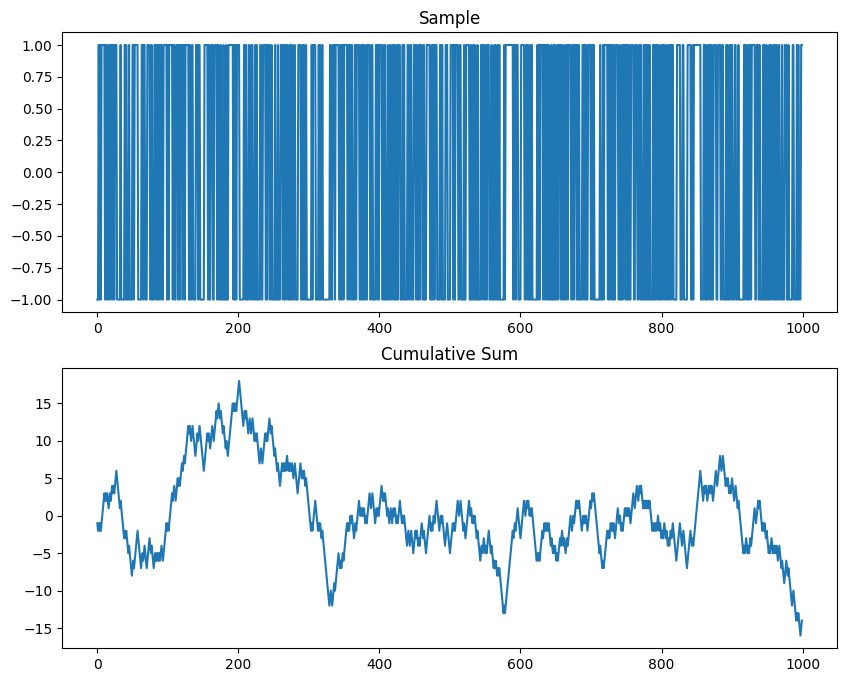

In [84]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))
ax[0].plot(sample)
ax[0].set_title("Sample")
ax[1].plot(movement)
ax[1].set_title("Cumulative Sum")
plt.show()

### E. Concept: Is the random walk stationary? Defend using quantitative tests.

Comment: No, a random walk is not stationary. In a random walk, each observation is equal to the previous observation plus a random shock or "step" that is drawn from a probability distribution. As a result, the series exhibits a stochastic trend and has a tendency to move in one direction over time. The mean of the series increases or decreases over time, depending on the sign of the random shocks, which means that the statistical properties of the series are not constant over time.



In [85]:
def adf_kpss_test2(data):
    # ADF Test
    adf_result = adfuller(data)
    adf_output = pd.Series(adf_result[0:4], index=['ADF Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in adf_result[4].items():
        adf_output['Critical Value (%s)'%key] = value
    adf_output['Test'] = 'ADF Test'
    
    # KPSS Test
    kpss_result = kpss(data)
    kpss_output = pd.Series(kpss_result[0:3], index=['KPSS Statistic', 'p-value', 'Number of Lags Used'])
    for key, value in kpss_result[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    kpss_output['Test'] = 'KPSS Test'
    
    # Combine the results
    result_df = pd.concat([adf_output, kpss_output], axis=0)
    
    return result_df.to_frame().T

In [86]:
adf_kpss_test2(movement_df)

,ADF Statistic,p-value,Number of Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%),Test,KPSS Statistic,p-value,Number of Lags Used,Critical Value (10%),Critical Value (5%),Critical Value (2.5%),Critical Value (1%),Test
0,-2.186056,0.211345,0.0,999.0,-3.436913,-2.864437,-2.568313,ADF Test,1.068302,0.01,19.0,0.347,0.463,0.574,0.739,KPSS Test


Comment: In this table, the ADF statistic with p-values that higher than 0.05, suggesting that we cannot reject the null hypothesis that the data is non-stationary.  The KPSS statistics has value higher than the critical values at the 10%, 5%, 2.5%, and 1% levels, and p-values that are less than 0.05, so  we rejeject null hypothesis of stationarity. Overall, the results suggest that the time series for random walk is non-stationary.

### F. Task: Difference the data and show the autocorrelation plot.

In [73]:
diff_move = movement_df.diff().dropna()
diff_move

,movement
1,-1.0
2,-1.0
3,1.0
4,1.0
5,1.0
...,...
995,1.0
996,-1.0
997,-1.0
998,1.0


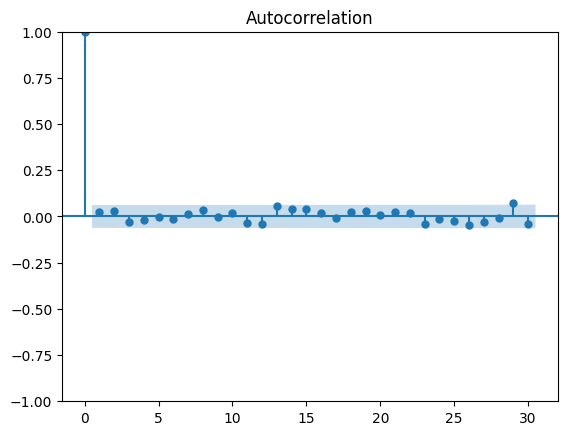

In [74]:
plot_acf(diff_move)
plt.show()

### G. Concept: What is the significance of this correlation plot?

 Plot shows no lags as significant, indicating there is no statistically significant correlation between the time series and its past values at any lag. This suggests that the time series may be a white noise process or a stationary process with no autocorrelation.

### H. Concept: Can a random walk be predicted? Why or why not?

In general, a random walk cannot be predicted with high accuracy in the long run. This is because the future values of a random walk process are determined by the current value plus a random shock or error term, which by definition is unpredictable. As a result, there is no deterministic pattern or structure in a random walk that can be exploited to predict future values.

However, it is possible to make short-term predictions of a random walk process using statistical models or algorithms that capture the random fluctuations in the series. For example, a moving average model or an autoregressive integrated moving average (ARIMA) model can be used to make short-term forecasts of a random walk series. These models can capture the random fluctuations in the series and use them to make predictions for the next few time periods.

Overall, while short-term predictions of a random walk process can be made, long-term predictions are typically unreliable due to the unpredictable nature of the random shocks.